## GHCNM with PKL

pkl generated from ghcnm.ipynb

https://www.ncdc.noaa.gov/ghcnm/v3.php<br />
ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/v3/README<br />
For Station ID check https://www.wmo.int/cpdb/volume_a_observing_stations/list_stations

<p>
This notebook is prep work for an ongoing Dash/Plotly interactive project plotting data provided by the following: 
    <ul>
        <li>The Global Historical Climatology Network-Monthly (GHCN-M) temperature dataset</li>
    </ul>
</p>
<p>
    Find the project here: 
</p>

In [1]:
import pandas as pd
import numpy as np
import pickle

import matplotlib
import matplotlib.pyplot as plt

In [2]:
# unpickle temps created with ghcnm.ipynb
with open('./ghcnm.tavg.v3.3.0.20170710.qca.dat.pkl', 'rb') as qca_file:
    qca_temps = pickle.load(qca_file)

# with open('./ghcnm_means.pkl', 'rb') as qca_file:
#     temps_mean = pickle.load(qca_file)

In [3]:
qca_temps.shape

(468436, 17)

In [4]:
qca_temps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 468436 entries, 0 to 468435
Data columns (total 17 columns):
ID             468436 non-null int64
CountryCode    468436 non-null int64
YEAR           468436 non-null int64
ELEMENT        468436 non-null object
VALUE1         468436 non-null int64
VALUE2         468436 non-null int64
VALUE3         468436 non-null int64
VALUE4         468436 non-null int64
VALUE5         468436 non-null int64
VALUE6         468436 non-null int64
VALUE7         468436 non-null int64
VALUE8         468436 non-null int64
VALUE9         468436 non-null int64
VALUE10        468436 non-null int64
VALUE11        468436 non-null int64
VALUE12        468436 non-null int64
Country        468436 non-null object
dtypes: int64(15), object(2)
memory usage: 64.3+ MB


In [5]:
# alternative count check
qca_temps.describe().loc[['count']]

,ID,CountryCode,YEAR,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,VALUE8,VALUE9,VALUE10,VALUE11,VALUE12
count,468436.0,468436.0,468436.0,468436.0,468436.0,468436.0,468436.0,468436.0,468436.0,468436.0,468436.0,468436.0,468436.0,468436.0,468436.0


In [6]:
pd.options.mode.chained_assignment = None  # default='warn'

cntrycode = 101
# mask2 = qca_temps['Country'].str.strip() == 'ALGERIA'
# Here are the country codes: ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/v3/country-codes
df_on_cntrycode = qca_temps[qca_temps['CountryCode'] == cntrycode]

# drop observations without all 12 months; read documentation regarding missing values
df_on_cntrycode.replace(-9999, np.NaN, inplace=True)
df_on_cntrycode.dropna(inplace=True)

print('Min/max year = {}, {} '.format(df_on_cntrycode['YEAR'].min(), df_on_cntrycode['YEAR'].max()))
print()

# view dataframe based on cntrycode
# print(df_on_cntrycode.head())
# view array of sorted years

# show array of years
sorted_years = df_on_cntrycode.sort_values("YEAR", ascending = True)
print(sorted_years.YEAR.unique())
print()

# number of contributing stations vary by year
# print('Sorted stations with count:')
# print(sorted_years[['ID', 'YEAR']].groupby(['YEAR']).agg(['count']))
# print()

# view dataframe based on year
# print(df_on_cntrycode[df_on_cntrycode['YEAR'] == 1856])

# years to compare
loYear = df_on_cntrycode['YEAR'] == 1856
hiYear = df_on_cntrycode['YEAR'] == 2016
temps_min = df_on_cntrycode[loYear]
temps_max = df_on_cntrycode[hiYear]

Min/max year = 1853, 2016 

[1853 1856 1857 1858 1859 1860 1861 1862 1864 1865 1867 1878 1879 1880 1881
 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896
 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911
 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926
 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941
 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956
 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971
 1972 1973 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1996 1997 1998 1999 2000 2001 2002 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]



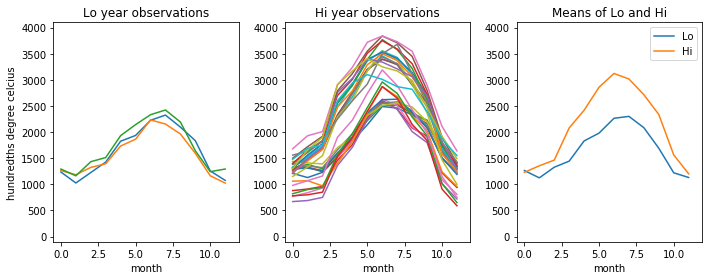

In [7]:
# 12 month x axis
x = np.arange(0, 12, 1)

plt.figure(figsize=(10, 4))

# number of contributing stations vary by year

# 1 x 3 plots
plt.subplot(131)
plt.title('Lo year observations')
plt.xlabel('month')
plt.ylabel('hundredths degree celcius')
plt.axis([-0.5, 11.9, -100, 4100])
for index, station in temps_min.iterrows():
    y = station[4:16].tolist()
    plt.plot(x, y)

plt.subplot(132)
plt.title('Hi year observations')
plt.xlabel('month')
plt.axis([-0.5, 11.9, -100, 4100])
for index, station in temps_max.iterrows():
    y = station[4:16].tolist()
    plt.plot(x, y)
    
plt.subplot(133)
plt.title('Means of Lo and Hi')
plt.xlabel('month')
plt.axis([-0.5, 11.9, -100, 4100])
plt.plot(x, temps_min.iloc[:,4:16].mean().tolist(), label='Lo')
plt.plot(x, temps_max.iloc[:,4:16].mean().tolist(), label='Hi')
plt.legend()


plt.tight_layout()
plt.show()

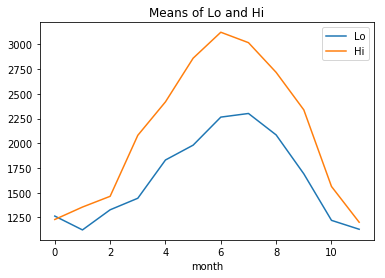

In [8]:
# github wouldn't let the 75Mb file ghcnm.tavg.v3.3.0.20170710.qca.dat.pkl upload so here is an alternative option
# see ghcnm_small_ghcnm_pkl.ipynb
# and create_small_pkl.ipynb

pd.options.mode.chained_assignment = None  # default='warn'

with open('./ghcnm_means.pkl', 'rb') as qca_file:
    temps_mean = pickle.load(qca_file)
    
temps_mean.reset_index(inplace=True)
cntrycode = 101
df_means_by_cntrycode = temps_mean[temps_mean['CountryCode'] == cntrycode]
    
# years to compare
loYear_means = df_means_by_cntrycode['YEAR'] == 1856
hiYear_means = df_means_by_cntrycode['YEAR'] == 2016
temps_min_means = df_means_by_cntrycode[loYear_means]
temps_max_means = df_means_by_cntrycode[hiYear_means]

x = np.arange(0, 12, 1)
    
plt.title('Means of Lo and Hi')
plt.xlabel('month')
plt.plot(x, temps_min_means.iloc[:,2:14].values[0], label='Lo')
plt.plot(x, temps_max_means.iloc[:,2:14].values[0], label='Hi')
plt.legend()
plt.show()